# Classifying cat and dog images using Convolutional Neural Networks

## Import the images

Download the images from source

In [18]:
!wget https://github.com/robitussin/tensorflow_lite_projects/blob/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip?raw=True

--2025-04-22 05:33:36--  https://github.com/robitussin/tensorflow_lite_projects/blob/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip?raw=True
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/robitussin/tensorflow_lite_projects/raw/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip [following]
--2025-04-22 05:33:37--  https://github.com/robitussin/tensorflow_lite_projects/raw/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/robitussin/tensorflow_lite_projects/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip [following]
--2025-04-22 05:33:37--  https://raw.githubusercontent.com/robitussin/tensorflow_lite_projects/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zi

Unzip the downloaded zip file

In [19]:
!unzip catsanddogs.zip?raw=True

Archive:  catsanddogs.zip?raw=True
replace catsanddogs/train/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import the libraries

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Hyperparameters: Set the image size and batch size

In [37]:
img_height, img_width = 32, 32
batch_size = 20

## Split the images into train, validation and test

In [38]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 202 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


## Display sample images from the dataset

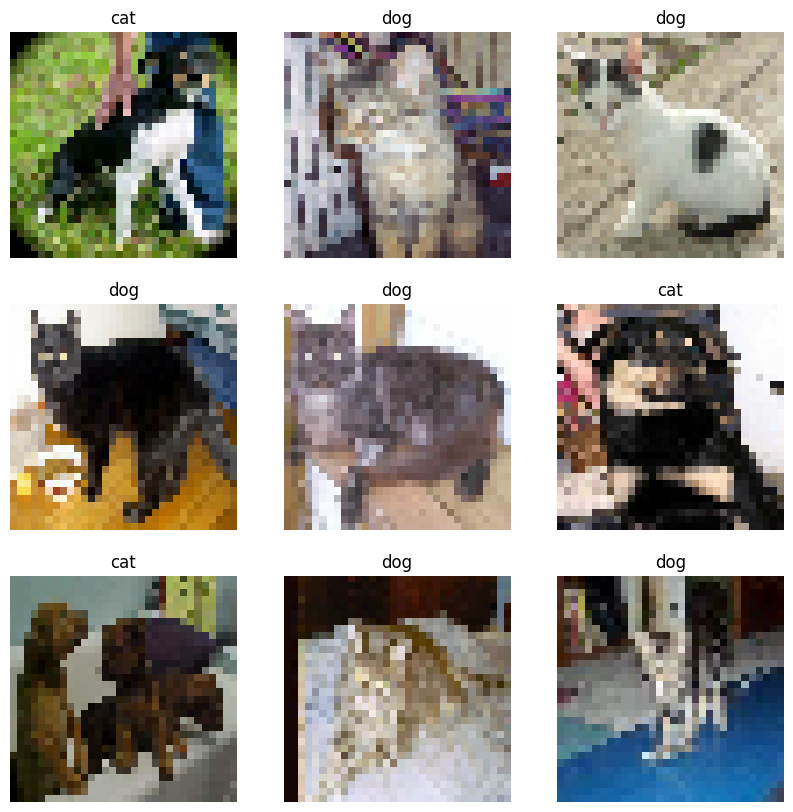

In [39]:
class_names = ["dog", "cat"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Create the Convolutional Neural Network Model (CNN)

In [40]:
model = tf.keras.Sequential()

In [41]:
model.add(tf.keras.layers.Rescaling(1./255))

In [42]:
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

In [43]:
model.add(tf.keras.layers.Flatten())

In [44]:
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(3))

In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Define the optimizer and loss function

In [46]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

## Train the model

In [47]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.5093 - loss: 0.9477 - val_accuracy: 0.5000 - val_loss: 0.7916
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5332 - loss: 0.7682 - val_accuracy: 0.4950 - val_loss: 0.7491
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5044 - loss: 0.7589 - val_accuracy: 0.5000 - val_loss: 0.7025
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5210 - loss: 0.7036 - val_accuracy: 0.5400 - val_loss: 0.6985
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5573 - loss: 0.6930 - val_accuracy: 0.4950 - val_loss: 0.7056
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4929 - loss: 0.6929 - val_accuracy: 0.5100 - val_loss: 0.6932
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4953 - loss: 0.6933 - val_accuracy: 0.5100 - val_loss: 0.6946
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5749 - loss: 0.6801 - val_accuracy: 0.5100 - 

## Test the model

In [48]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5250 - loss: 0.6882


[0.6898229718208313, 0.5299999713897705]

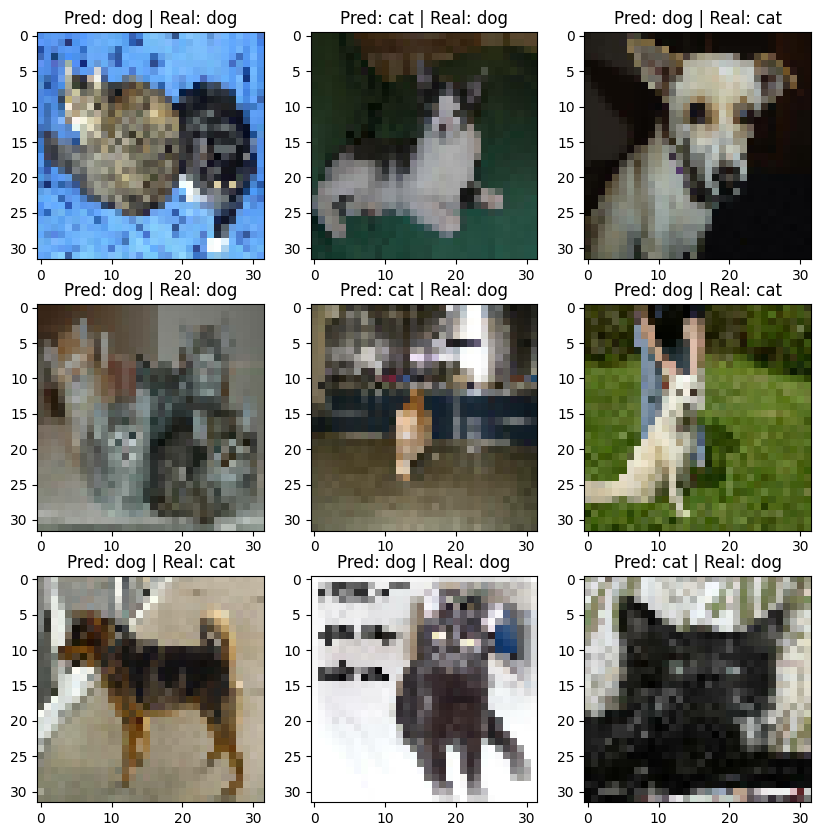

In [49]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

## Save the model

In [ ]:
model.save('fruitmodel.keras')